CNN: is a type of deep learning model mainly used fo image data.
* CNN preserve spatial structure (height, width color etc..)
### Use Cass
* Image Classification (Pizza or Steak,)
* Face Recognition (Mask without mask)
* Medical Imaging
* Self Driving Cars

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
tf.random.set_seed(42)
import zipfile
from tensorflow.keras.preprocessing import image

In [3]:
print('Tensorflow Version: ',tf.__version__)

Tensorflow Version:  2.19.0


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 74% 121M/163M [00:00<00:00, 1.27GB/s]
100% 163M/163M [00:00<00:00, 1.24GB/s]


In [5]:
with zipfile.ZipFile('face-mask-dataset.zip','r') as zip_ref:
    zip_ref.extractall('.')

In [6]:
base_dir = 'data'
os.listdir(base_dir)

['without_mask', 'with_mask']

In [7]:
datagen=ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [8]:
train_data=datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

Found 6043 images belonging to 2 classes.


In [9]:
test_data=datagen.flow_from_directory(
    base_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)


Found 1510 images belonging to 2 classes.


In [10]:
model=Sequential(
    [
        tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1,activation='sigmoid')


    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,175,777 (84.59 MB)

 Trainable params: 22,175,777 (84.59 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(train_data,epochs=5,validation_data=test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 74/189 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.6259 - loss: 0.9138

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.7302 - loss: 0.6445 - val_accuracy: 0.9185 - val_loss: 0.2204
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8945 - loss: 0.2589 - val_accuracy: 0.8040 - val_loss: 0.4696
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.9039 - loss: 0.2367 - val_accuracy: 0.9318 - val_loss: 0.2113
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9493 - loss: 0.1361 - val_accuracy: 0.9397 - val_loss: 0.1893
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9615 - loss: 0.1061 - val_accuracy: 0.9404 - val_loss: 0.1891


In [14]:
loss,accuracy=model.evaluate(test_data)
print('Loss: ',loss)
print('Accuracy: ',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9317 - loss: 0.2015
Loss:  0.18909718096256256
Accuracy:  0.940397322177887


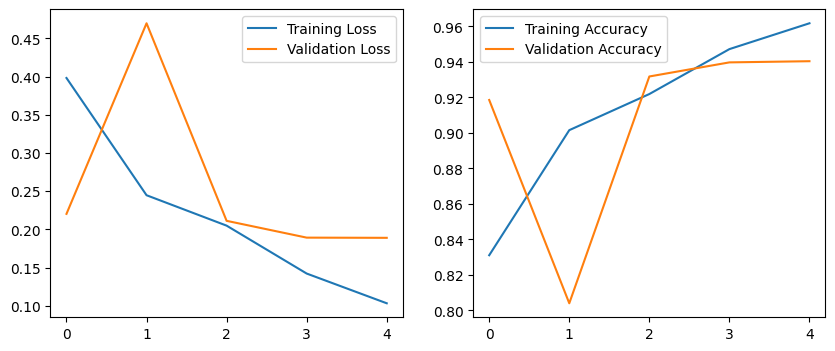

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


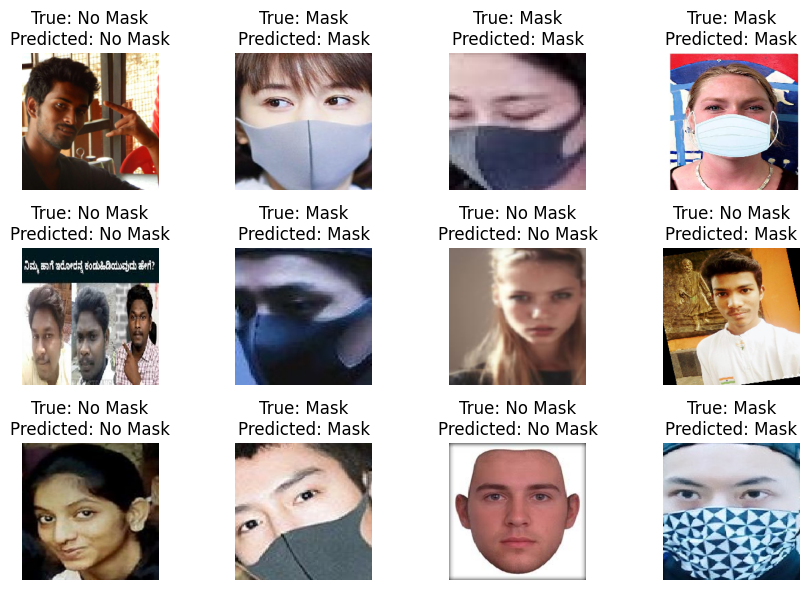

In [24]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    true_label='Mask' if labels[i]==0 else 'No Mask'
    pred_label='Mask' if predictions[i]<0.5 else 'No Mask'
    plt.title(f'True: {true_label}\nPredicted: {pred_label}')
    plt.tight_layout()
plt.show()




Saving jinah.jpg to jinah (1).jpg
File Uploaded:  /content/jinah (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: No Mask


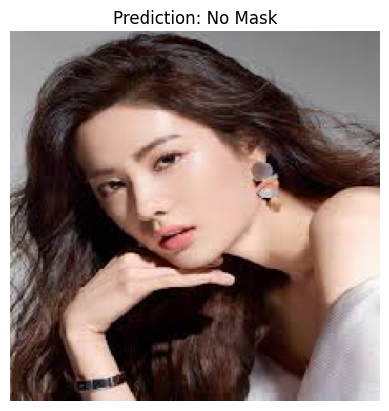

In [28]:
#from tensorflow.keras.preprocessing import image
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
    img_path='/content/'+fn
    print('File Uploaded: ',img_path)
    img=image.load_img(img_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    prediction=model.predict(img_array)[0][0]
    label='Mask' if prediction<0.5 else 'No Mask'
    print(f'Prediction: {label}')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {label}')
    plt.show()

